# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [69]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not
from statsmodels.graphics.gofplots import qqplot

In [70]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`.

In [71]:
import pandas as pd

df = pd.read_csv(url)
print(df.head())

  aspiration enginelocation carwidth  curbweight enginetype cylindernumber  \
0        std          front     64.1        2548       dohc           four   
1        std          front     64.1        2548       dohc           four   
2        std          front     65.5        2823       ohcv            six   
3        std          front      NaN        2337        ohc           four   
4        std          front     66.4        2824        ohc           five   

   stroke  peakrpm      price  
0    2.68     5000  expensive  
1    2.68     5000  expensive  
2    3.47     5000  expensive  
3    3.40     5500  expensive  
4    3.40     5500  expensive  


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [72]:
df = df.drop_duplicates()
print(df.head())

  aspiration enginelocation carwidth  curbweight enginetype cylindernumber  \
0        std          front     64.1        2548       dohc           four   
2        std          front     65.5        2823       ohcv            six   
3        std          front      NaN        2337        ohc           four   
4        std          front     66.4        2824        ohc           five   
5        std          front     66.3        2507        ohc           five   

   stroke  peakrpm      price  
0    2.68     5000  expensive  
2    3.47     5000  expensive  
3    3.40     5500  expensive  
4    3.40     5500  expensive  
5    3.40     5500  expensive  


## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [73]:
from sklearn.impute import SimpleImputer

# Identifie les colonnes numériques et catégorielles
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute les valeurs manquantes pour les colonnes numériques avec la médiane
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Impute les valeurs manquantes pour les colonnes catégorielles avec la valeur la plus fréquente
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print(df.head())

  aspiration enginelocation carwidth  curbweight enginetype cylindernumber  \
0        std          front     64.1      2548.0       dohc           four   
2        std          front     65.5      2823.0       ohcv            six   
3        std          front     66.5      2337.0        ohc           four   
4        std          front     66.4      2824.0        ohc           five   
5        std          front     66.3      2507.0        ohc           five   

   stroke  peakrpm      price  
0    2.68   5000.0  expensive  
2    3.47   5000.0  expensive  
3    3.40   5500.0  expensive  
4    3.40   5500.0  expensive  
5    3.40   5500.0  expensive  


### `carwidth`

<details>
    <summary> 💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [74]:
import numpy as np

# Remplace les représentations non standard des valeurs manquantes par np.nan
df['carwidth'] = df['carwidth'].replace('*', np.nan)

# Converti la colonne en type numérique, car elle peut contenir des chaînes de caractères
df['carwidth'] = pd.to_numeric(df['carwidth'], errors='coerce')

# Impute les valeurs manquantes avec la médiane
median_value = df['carwidth'].median()
df['carwidth'].fillna(median_value, inplace=True)

print(df['carwidth'].head())

0    64.1
2    65.5
3    66.5
4    66.4
5    66.3
Name: carwidth, dtype: float64


### `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [75]:
from sklearn.impute import SimpleImputer

# Création de l'imputer pour les variables catégorielles
cat_imputer = SimpleImputer(strategy='most_frequent')

# Application de l'imputer à la colonne 'enginelocation'
df['enginelocation'] = cat_imputer.fit_transform(df[['enginelocation']])
print(df['enginelocation'].head())

0    front
2    front
3    front
4    front
5    front
Name: enginelocation, dtype: object


🧪 **Test your code**

In [76]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 1.43s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

In [77]:
# As a reminder, some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    float64
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    float64
 8   price           191 non-null    object 
dtypes: float64(4), object(5)
memory usage: 14.9+ KB


In [78]:
# And here are the numerical features of the dataset we need to scale
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 <i>Hint</i> </summary>

    
ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions but also some outliers. Hence, it is advisable to use `RobustScaler()`.
</details>

In [79]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
columns_to_scale = ['peakrpm', 'carwidth', 'stroke']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())

    peakrpm  carwidth    stroke
0 -0.142857 -0.518519 -2.033333
2 -0.142857  0.000000  0.600000
3  0.571429  0.370370  0.366667
4  0.571429  0.333333  0.366667
5  0.571429  0.296296  0.366667


In [80]:
# YOUR CODE HERE

### `curbweight`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [81]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
column_to_scale = ['curbweight']
df[column_to_scale] = scaler.fit_transform(df[column_to_scale])
print(df[column_to_scale].head())

   curbweight
0   -0.048068
2    0.476395
3   -0.450474
4    0.478302
5   -0.126260


In [82]:
# YOUR CODE HERE

🧪 **Test your code**

In [83]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 0.57s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One-hot encoding
- Manual ordinal encoding

In the Dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [84]:
df = pd.get_dummies(df, columns=['aspiration', 'enginelocation'], drop_first=False)
df.rename(columns={'aspiration_std': 'aspiration', 'enginelocation_front': 'enginelocation'}, inplace=True)
print(df.head())

   carwidth  curbweight enginetype cylindernumber    stroke   peakrpm  \
0 -0.518519   -0.048068       dohc           four -2.033333 -0.142857   
2  0.000000    0.476395       ohcv            six  0.600000 -0.142857   
3  0.370370   -0.450474        ohc           four  0.366667  0.571429   
4  0.333333    0.478302        ohc           five  0.366667  0.571429   
5  0.296296   -0.126260        ohc           five  0.366667  0.571429   

       price  aspiration  aspiration_turbo  enginelocation  \
0  expensive           1                 0               1   
2  expensive           1                 0               1   
3  expensive           1                 0               1   
4  expensive           1                 0               1   
5  expensive           1                 0               1   

   enginelocation_rear  
0                    0  
2                    0  
3                    0  
4                    0  
5                    0  


### `enginetype`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [85]:
df = pd.get_dummies(df, columns=['enginetype'])
print(df.head())

   carwidth  curbweight cylindernumber    stroke   peakrpm      price  \
0 -0.518519   -0.048068           four -2.033333 -0.142857  expensive   
2  0.000000    0.476395            six  0.600000 -0.142857  expensive   
3  0.370370   -0.450474           four  0.366667  0.571429  expensive   
4  0.333333    0.478302           five  0.366667  0.571429  expensive   
5  0.296296   -0.126260           five  0.366667  0.571429  expensive   

   aspiration  aspiration_turbo  enginelocation  enginelocation_rear  \
0           1                 0               1                    0   
2           1                 0               1                    0   
3           1                 0               1                    0   
4           1                 0               1                    0   
5           1                 0               1                    0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0                1                 0             0        

In [86]:
df.shape

(191, 17)

### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [87]:
mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}

df['cylindernumber'] = df['cylindernumber'].map(mapping)
print(df['cylindernumber'].head())

0    4
2    6
3    4
4    5
5    5
Name: cylindernumber, dtype: int64


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it ❓

<br/>

<details>
    <summary>💡 Hint </summary>

Look at the current distribution of the `cylindernumber` and ask yourself the following questions:
- Does scaling affect a feature's distribution ?
- According to the distribution of this feature, what is the most appropriate scaling method?
</details>

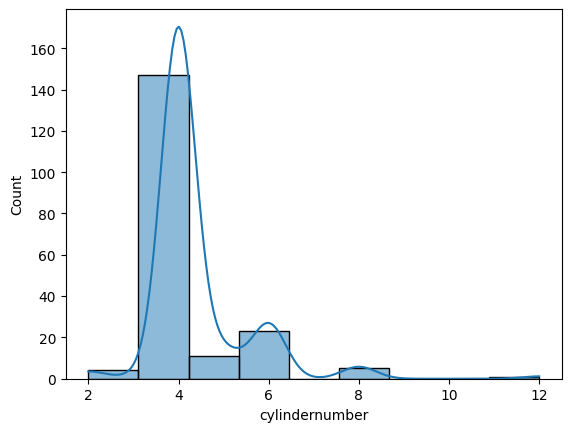

0    0.0
2    2.0
3    0.0
4    1.0
5    1.0
Name: cylindernumber, dtype: float64


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler


sns.histplot(df['cylindernumber'], kde=True)
plt.show()

scaler = RobustScaler()
df['cylindernumber'] = scaler.fit_transform(df[['cylindernumber']])
print(df['cylindernumber'].head())

<details>
    <summary><i>Here is a screenshot of how your dataframe shoud look like after scaling and encoding</i></summary>
    
    
<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/car_price_after_scaling_and_encoding.png">    

</details>

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [89]:
df['price'] = df['price'].map({'cheap': 0, 'expensive': 1})
print(df['price'].head())

0    1
2    1
3    1
4    1
5    1
Name: price, dtype: int64


🧪 **Test your code**

In [90]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.72s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np


# Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Create RegLin
model = LogisticRegression(max_iter=1000)

# CV
scores = cross_val_score(model, X, y, cv=5)

# Res
base_model_score = np.mean(scores)
print("Score moyen du modèle de base:", base_model_score)

Score moyen du modèle de base: 0.8326585695006747


🧪 **Test your code**

In [94]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection (with _Permutation Importance_)

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import numpy as np

# Create model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

# compute importance of permutation
perm_importance = permutation_importance(model, X, y, n_repeats=10)

# sort features by importance
sorted_features = perm_importance.importances_mean.argsort()

# delete weak features and assess
strong_features = list(X.columns)
strong_model_score = np.mean(cross_val_score(model, X[strong_features], y, cv=5))

for i in range(len(sorted_features)):
    feature_to_remove = X.columns[sorted_features[i]]
    strong_features.remove(feature_to_remove)
    temp_score = np.mean(cross_val_score(model, X[strong_features], y, cv=5))
    
    # if perf below significative, star using previous features
    if temp_score < strong_model_score - 0.01:  # tweakable treshold
        strong_features.append(feature_to_remove)
        break
    else:
        strong_model_score = temp_score

print("Model score fro strong features:", strong_model_score)

Score du modèle avec des caractéristiques fortes: 0.9006747638326585


🧪 **Test your code**

In [96]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-car-prices/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.16s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [ ]:
# YOUR CODE HERE

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [ ]:
# YOUR CODE HERE

It should still be pretty close to 50/50 ☝️ 

***But what if we change the random state?*** 

❓ Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data. ❓

In [ ]:
# YOUR CODE HERE

You will observe that the proportion changes every time, sometimes even quite drastically 😱! This can affect model performance!

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` _vs._ `random_state=9` ❓ 

Remember to fit on training data and score on testing data.

In [ ]:
# YOUR CODE HERE

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is 34.5%, quite far from the 57.9% in the training set or even the 50% in the original dataset.

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

***So how do we fix this issue? How do we keep the same distribution of classes across the train set and the test set? 🔧***

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of the `cv` parameter in 📚 [**sklearn.model_selection.cross_validate**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

The answer is to use the following:

>📚 [**Stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

### Stratification of the target

💡 We can also use the ***strafification*** technique in a `train_test_split`.

❓ Run through the same 1 to 10 random state loop again, but this time also ***pass `stratify=y` into the holdout method***. ❓

In [ ]:
# YOUR CODE HERE

👀 Even if the random state is changing, the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

We need `StratifiedKFold` 🔬



### Stratification - generalized

📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `K` splits, while stratifying on certain columns (features or target).

This way, we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [ ]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

📖 Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!